<a href="https://colab.research.google.com/github/panimesh14/Financial-Time-Series-Analysis-and-Forecasting/blob/main/Financial_Time_Series_Analysis_AR_ARIMA_SARIMA_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip3 install yfinance
import yfinance as yf
SLB = yf.Ticker("SLB");
data = yf.download(['SLB','HAL','WFRD','BKR'],start='2000-01-01')

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------------- -------------------------- 1.0/3.0 MB 6.3 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/3.0 MB 4.2 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 4.5 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 4.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------ --------- 1.0/1.4 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.wh

[*********************100%***********************]  4 of 4 completed


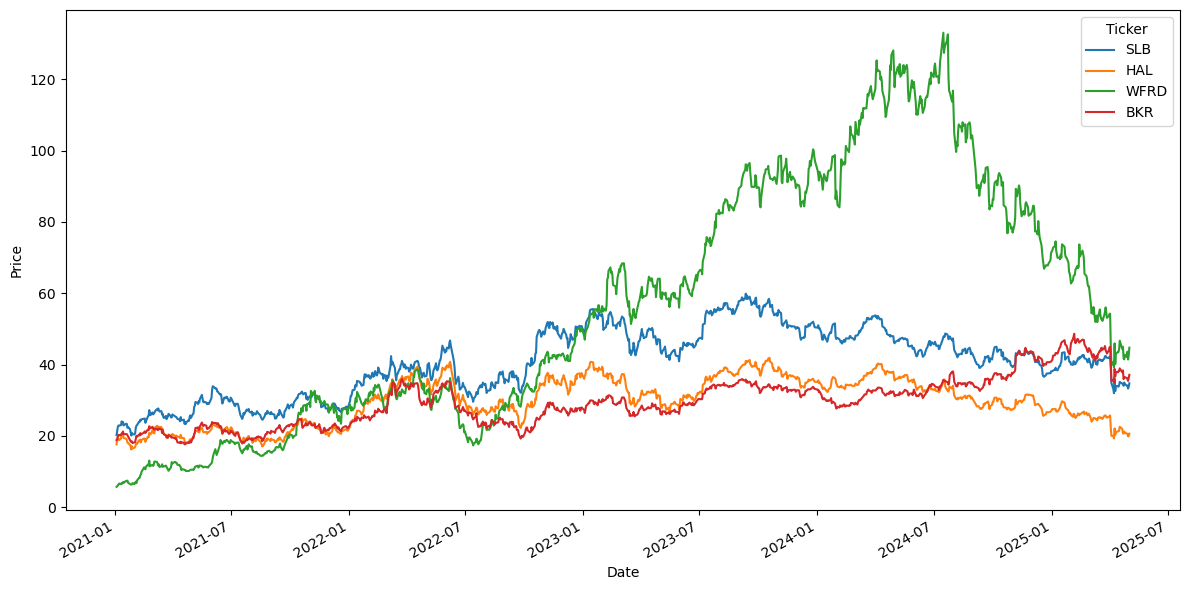

In [ ]:
data['Close'][['SLB','HAL','WFRD','BKR']]['2021-01-01':].plot(figsize=(12,6))
plt.ylabel('Price')
plt.tight_layout()

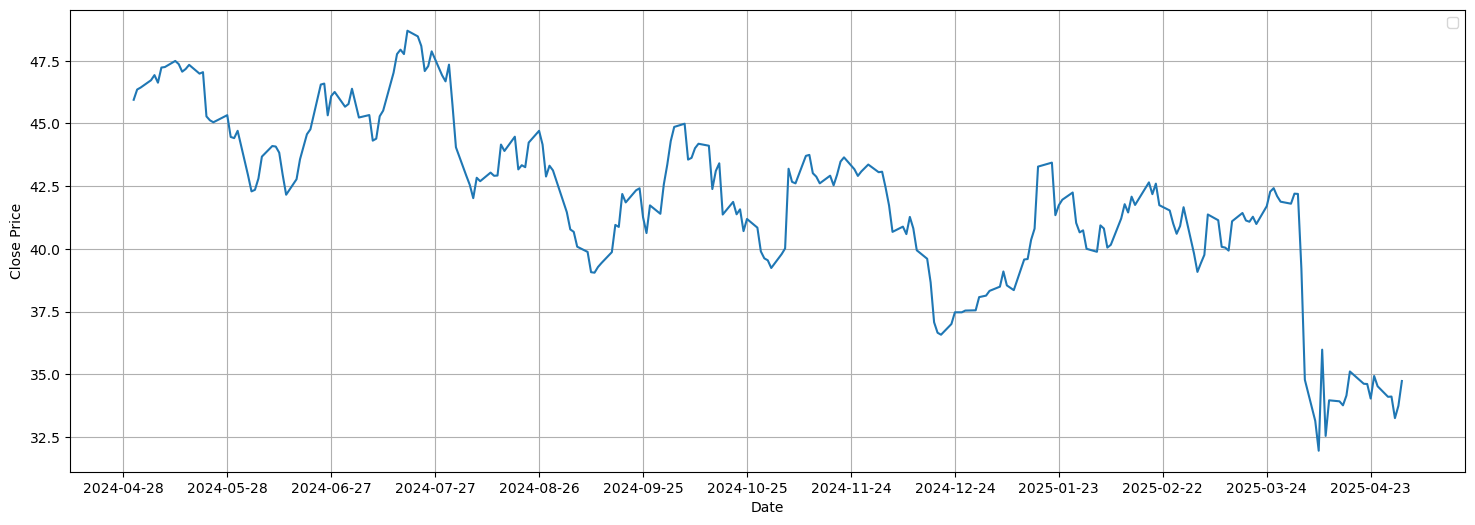

In [ ]:
import datetime as datetime
import matplotlib.dates as mdates

plt.figure(figsize=(18,6))
stocks_og = data;
stocks_year = stocks_og['Close']['SLB']['2024-05-01':];
plt.plot(stocks_year.index,stocks_year)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.ylabel('Close Price')
plt.xlabel('Date')#,labelpad=30)
plt.legend()
plt.grid(True)

#A seassonality of around 30 days can be seen on the plot with a falling and rising pattern every month end or beginning of the month
#An overall general downward trend is also visible for the given period of 1 year
#stocks_og['Close']['SLB']['2024-05-01':].plot(figsize=(12,6))

# Classical Time Series Decomposition

In [ ]:
!pip3 install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
def classical_time_series_decomposition(stocks_year,model = 'additive', period=30):
    decomposition_additive = seasonal_decompose(stocks_year,model=model,period=period)
    decomposition_additive.plot()
    return decomposition_additive

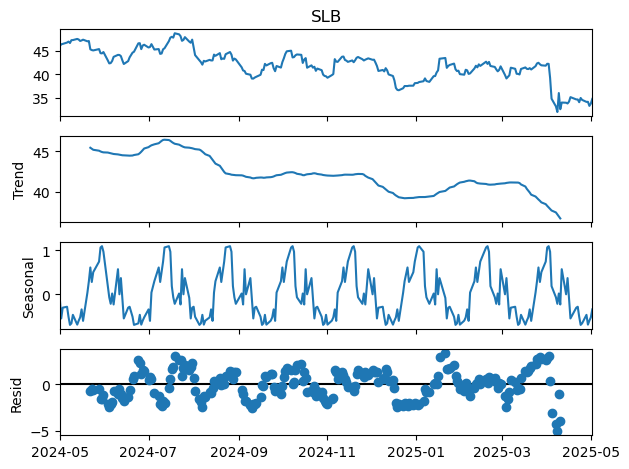

In [ ]:
decomposition_additive = classical_time_series_decomposition(stocks_year,model = 'additive', period=30)

In [ ]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

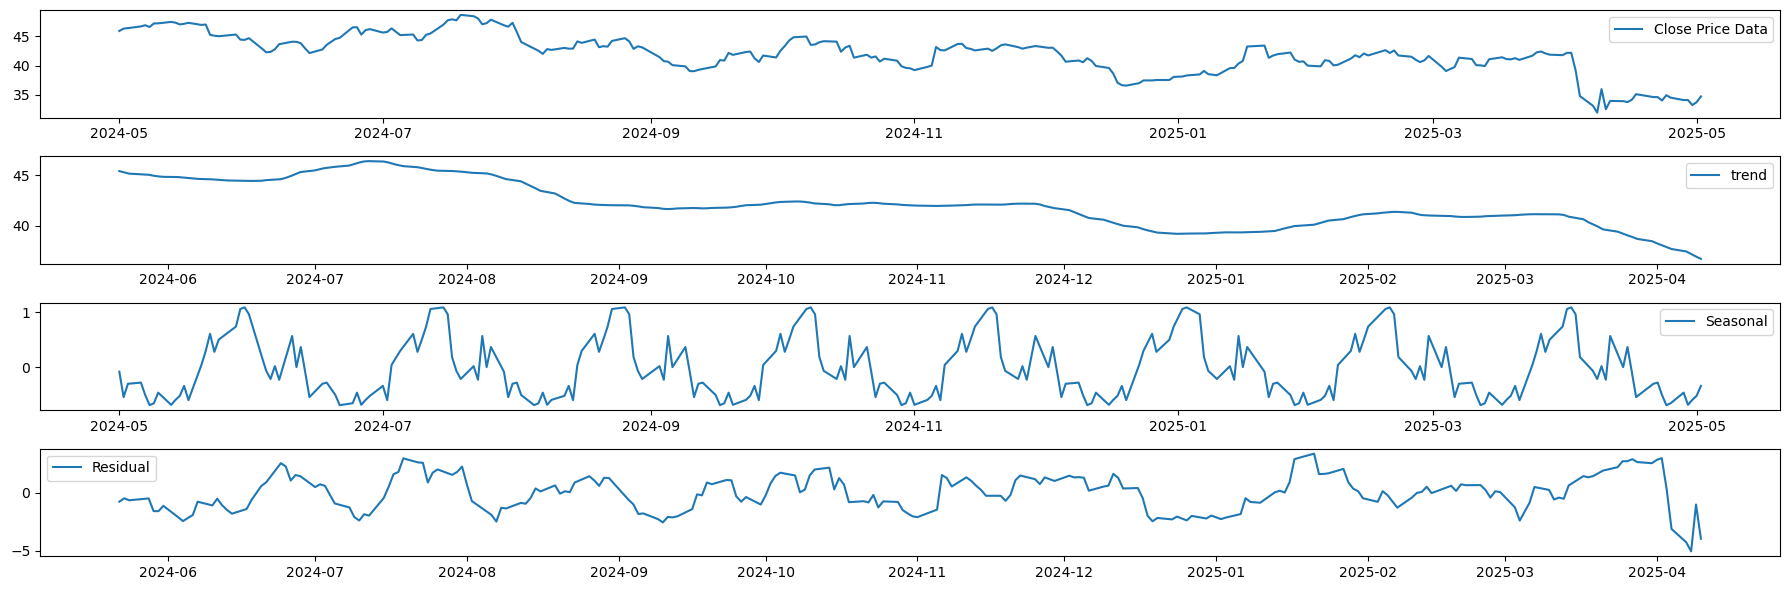

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(411)
plt.plot(stocks_year,label='Close Price Data')
plt.legend()
plt.subplot(412)
plt.plot(trend_additive,label='trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal_additive,label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual_additive,label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

# STL (Seasonal Trend decomposition using LOESS-Locally Estimated Scatterplot Smoothing) Time Series Decomposition

In [ ]:
from statsmodels.tsa.seasonal import STL
def STL_decompose(stocks_year: pd.DataFrame,period=30):
    stl_decompose = STL(stocks_year,period = period)
    result = stl_decompose.fit()
    result.plot()
    return result

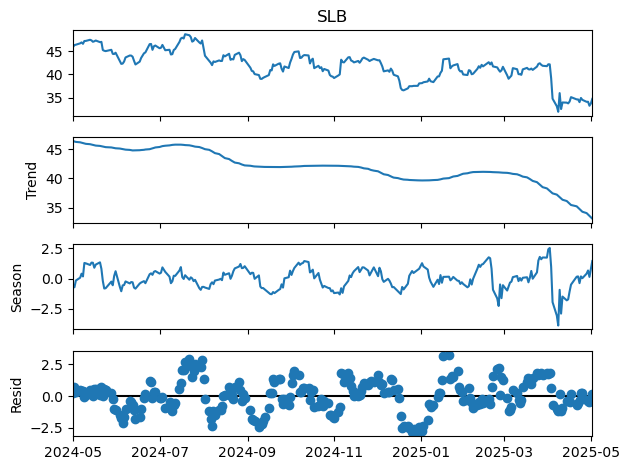

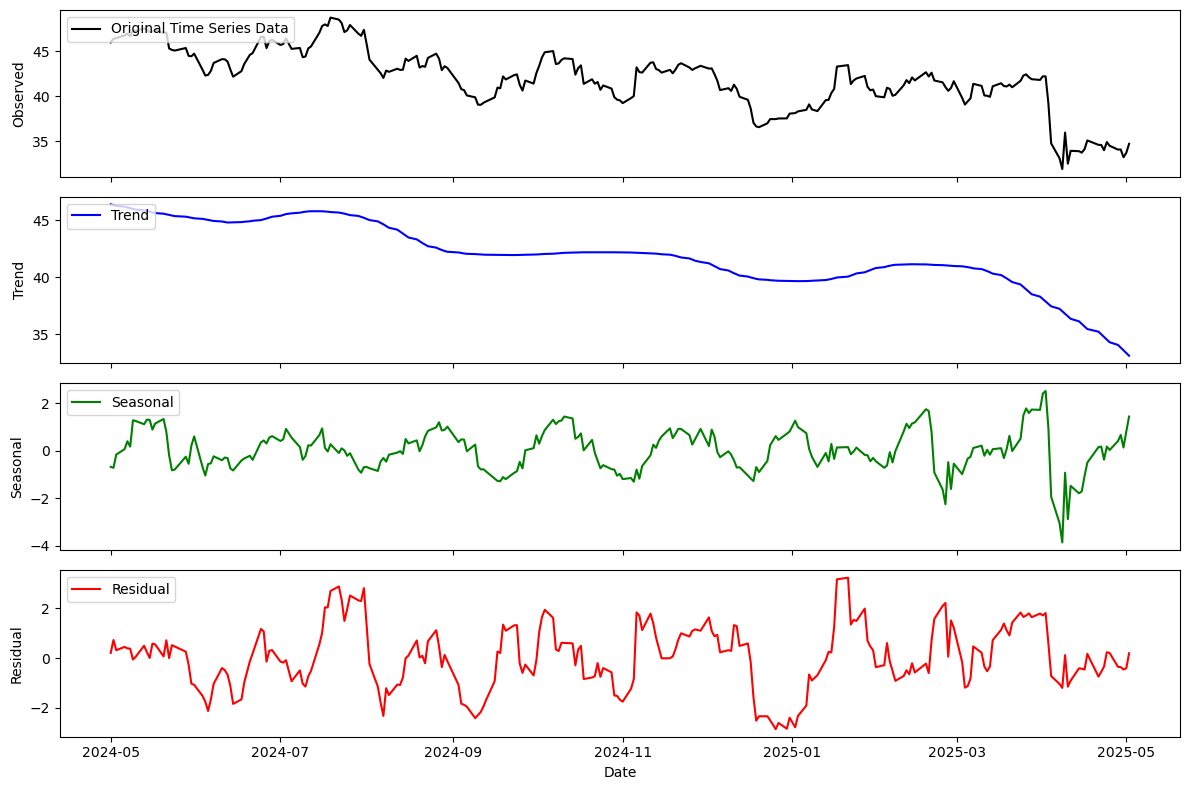

In [ ]:
result = STL_decompose(stocks_year,30);
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

axes[0].plot(result.observed, label='Original Time Series Data', color='black')
axes[0].legend(loc='upper left')
axes[0].set_ylabel('Observed')

axes[1].plot(result.trend, label='Trend', color='blue')
axes[1].legend(loc='upper left')
axes[1].set_ylabel('Trend')

axes[2].plot(result.seasonal, label='Seasonal', color='green')
axes[2].legend(loc='upper left')
axes[2].set_ylabel('Seasonal')

axes[3].plot(result.resid, label='Residual', color='red')
axes[3].legend(loc='upper left')
axes[3].set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ADF_test(stocks_year: pd.DataFrame):
    adf_test = adfuller(stocks_year)
    print('ADF Test Results')
    print(f'ADF Statistic: {adf_test[0]}')
    print(f'p-value:{adf_test[1]}')
    print('Critical values:')
    for key,value in adf_test[4].items():
        print(f'{key}:{value}')

# NOTE: H0: data is not stationary and has unit root while H1: data is stationary

In [ ]:
from statsmodels.tsa.stattools import kpss
def KPSS_test(stocks_year: pd.DataFrame,reg='ct'):
    kpss_test = kpss(stocks_year,regression=reg)
    print('KPSS Test Results:')
    print(f'KPSS Statistic: {kpss_test[0]}')
    print(f'p-value:{kpss_test[1]}')
    print('Critical values:')
    for key,value in kpss_test[3].items():
        print(f'{key}:{value}')
# NOTE: H0: data is stationary and H1: data is not stationary

In [ ]:
ADF_test(stocks_year)
KPSS_test(stocks_year,reg='ct')
# The time series is non-stationary at diff 0
#p-value is greater than 0.05 and ADF statistic greater than critical value for 5% by which ADF test implies non-stationary trend or unit root for the time series
#For KPSS test or KPSS statistic less than 5% critical values and although p-value greater than 0.05 implying slight non-stationarity trend compared to mean value trend

ADF Test Results
ADF Statistic: -1.6659891413009387
p-value:0.44871554664238317
Critical values:
1%:-3.4566744514553016
5%:-2.8731248767783426
10%:-2.5729436702592023
KPSS Test Results:
KPSS Statistic: 0.06672591715772692
p-value:0.1
Critical values:
10%:0.119
5%:0.146
2.5%:0.176
1%:0.216


# Differencing the Series

ADF Test Results
ADF Statistic: -15.237846245273227
p-value:5.2124638980332305e-28
Critical values:
1%:-3.456780859712
5%:-2.8731715065600003
10%:-2.572968544
KPSS Test Results:
KPSS Statistic: 0.028651259321895946
p-value:0.1
Critical values:
10%:0.119
5%:0.146
2.5%:0.176
1%:0.216


Text(0.5, 1.0, '1st difference of Time Series')

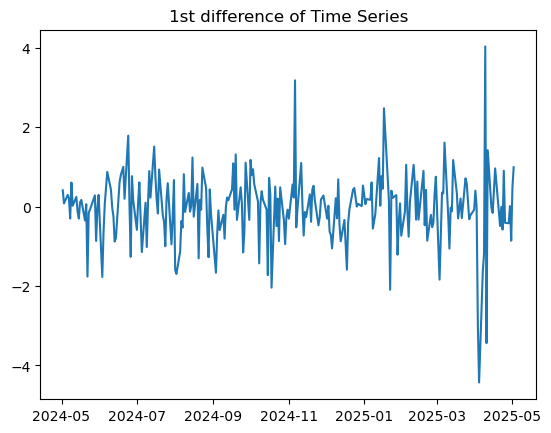

In [ ]:
# 1st difference
stocks_year_diff = stocks_year.diff()
ADF_test(stocks_year_diff.dropna())
KPSS_test(stocks_year_diff.dropna(),reg='ct')
plt.plot(stocks_year_diff.dropna().index,stocks_year_diff.dropna())
plt.title('1st difference of Time Series')
# By ADF test p-value less than 0.05 and and ADF statistic less than the critical value at 5% implying non-unit root or non-stationarity trend
# By KPSS test p-value less greater than 0.05 but KPSS test statistic less than the crtical value for 5% imply8ing close to weak stationarity

ADF Test Results
ADF Statistic: -8.427976154464172
p-value:1.9039094757263478e-13
Critical values:
1%:-3.4578942529658563
5%:-2.8736593200231484
10%:-2.573228767361111
KPSS Test Results:
KPSS Statistic: 0.12347814484796528
p-value:0.09170713917043466
Critical values:
10%:0.119
5%:0.146
2.5%:0.176
1%:0.216


Text(0.5, 1.0, '2nd difference of Time Series')

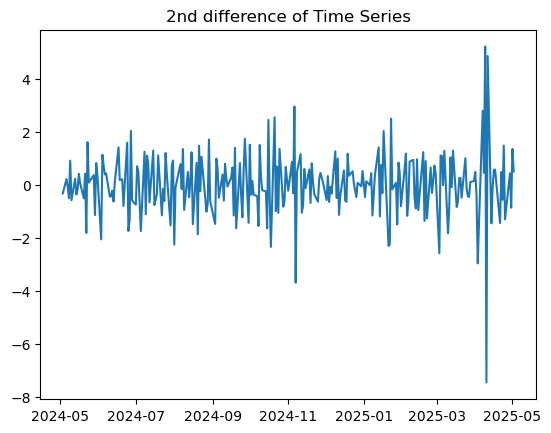

In [ ]:
# 2nd difference
stocks_year_diff = stocks_year.diff().diff()
ADF_test(stocks_year_diff.dropna())
KPSS_test(stocks_year_diff.dropna(),reg='ct')
plt.plot(stocks_year_diff.dropna().index,stocks_year_diff.dropna())
plt.title('2nd difference of Time Series')
# By ADF test p-value less than 0.05 and and ADF statistic less than the critical value at 5% implying non-unit root or non-stationarity trend
# By KPSS test p-value less greater than 0.05 but KPSS test statistic less than the crtical value for 5% imply8ing close to weak stationarity

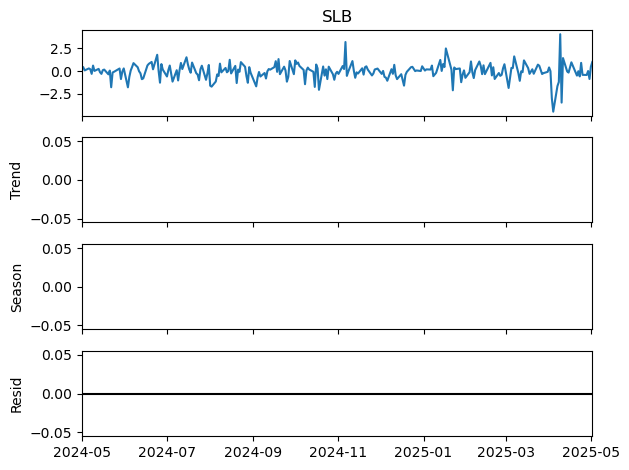

In [ ]:
result_diff = STL_decompose(stocks_year_diff);

ADF Test Results
ADF Statistic: -8.427976154464172
p-value:1.9039094757263478e-13
Critical values:
1%:-3.4578942529658563
5%:-2.8736593200231484
10%:-2.573228767361111
KPSS Test Results:
KPSS Statistic: 0.12347814484796528
p-value:0.09170713917043466
Critical values:
10%:0.119
5%:0.146
2.5%:0.176
1%:0.216


Text(0.5, 1.0, '2nd difference of Time Series')

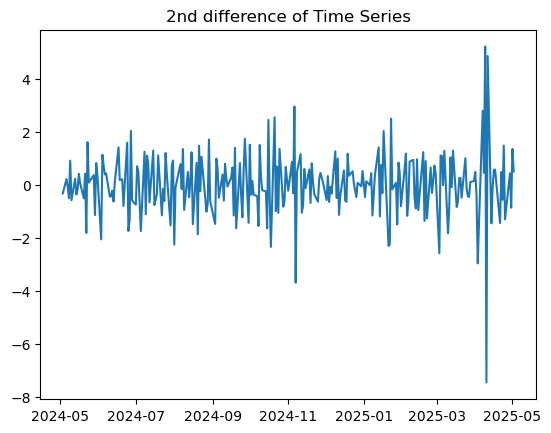

In [ ]:
# 2nd Difference
stocks_year_diff = stocks_year.diff().diff()
ADF_test(stocks_year_diff.dropna())
KPSS_test(stocks_year_diff.dropna(),reg='ct')
plt.plot(stocks_year_diff.dropna().index,stocks_year_diff.dropna())
plt.title('2nd difference of Time Series')

# Log Transformation

ADF Test Results
ADF Statistic: -1.6636313882538987
p-value:0.4499413146440539
Critical values:
1%:-3.4566744514553016
5%:-2.8731248767783426
10%:-2.5729436702592023
KPSS Test Results:
KPSS Statistic: 0.07327289865531782
p-value:0.1
Critical values:
10%:0.119
5%:0.146
2.5%:0.176
1%:0.216


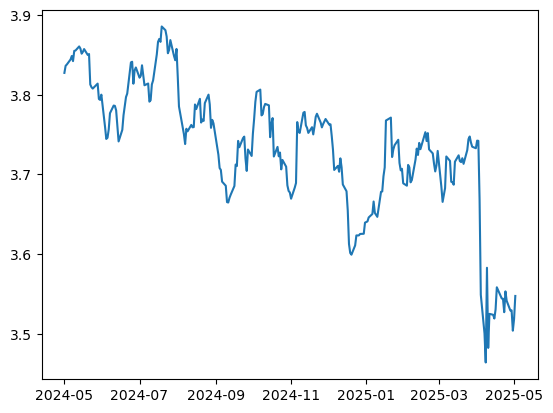

In [ ]:
from scipy import stats
stocks_year_log = np.log(stocks_year)
ADF_test(stocks_year_log.dropna())
KPSS_test(stocks_year_log.dropna(),reg='ct')
plt.plot(stocks_year_log.dropna().index,stocks_year_log)
# By ADF test, p-value is less than 0.05 and close to it but ADF statistic is greater than the critical value for 5% which implies non-stationary unit root presence
# By KPSS test, p-value is 0.1 and greater than 0.05 but KPSS statistic is less than the 5% critical value implying non-stationarity

# Power Transformation (Square Root)

ADF Test Results
ADF Statistic: -1.6606870197951389
p-value:0.4514729631825371
Critical values:
1%:-3.4566744514553016
5%:-2.8731248767783426
10%:-2.5729436702592023
KPSS Test Results:
KPSS Statistic: 0.06951665857217838
p-value:0.1
Critical values:
10%:0.119
5%:0.146
2.5%:0.176
1%:0.216


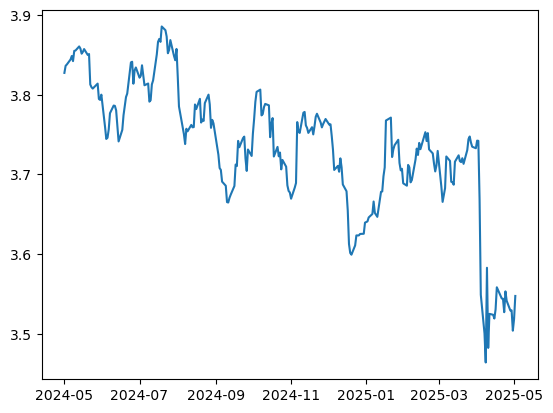

In [ ]:
stocks_year_sqrt = np.sqrt(stocks_year)
ADF_test(stocks_year_sqrt.dropna())
KPSS_test(stocks_year_sqrt.dropna(),reg='ct')
plt.plot(stocks_year_sqrt.dropna().index,stocks_year_log)

# Box Cox Tranform

In [ ]:
from scipy import stats
stocks_year_boxcox_transform = stats.boxcox(stocks_year[stocks_year>0])
stocks_year_boxcox = stocks_year_boxcox_transform[0]
stocks_year_boxcox_lambda = stocks_year_boxcox_transform[1]
ADF_test(stocks_year_boxcox)
KPSS_test(stocks_year_boxcox,reg='ct')

ADF Test Results
ADF Statistic: -2.010870473780399
p-value:0.28182720936394734
Critical values:
1%:-3.456780859712
5%:-2.8731715065600003
10%:-2.572968544
KPSS Test Results:
KPSS Statistic: 0.0670654845062914
p-value:0.1
Critical values:
10%:0.119
5%:0.146
2.5%:0.176
1%:0.216


In [ ]:
len(stocks_year_boxcox)

252

ADF Test Results
ADF Statistic: -3.080115748916447
p-value:0.028060138038698914
Critical values:
1%:-3.4566744514553016
5%:-2.8731248767783426
10%:-2.5729436702592023
KPSS Test Results:
KPSS Statistic: 0.06672591715772974
p-value:0.1
Critical values:
10%:0.119
5%:0.146
2.5%:0.176
1%:0.216


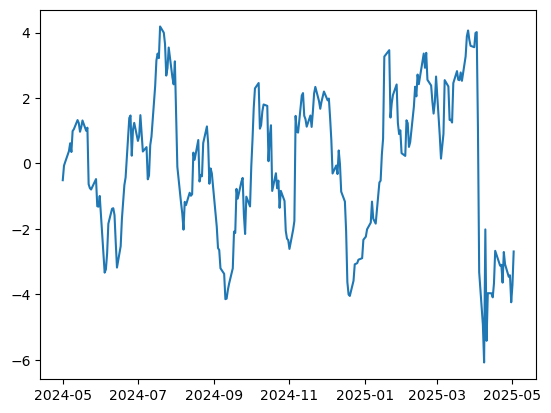

In [ ]:
trend = np.polyfit(np.arange(len(stocks_year)),stocks_year,1)
trendline = np.polyval(trend, np.arange(len(stocks_year)))
stocks_year_detrended = stocks_year-trendline
ADF_test(stocks_year_detrended)
KPSS_test(stocks_year_detrended,reg='ct')
plt.plot(stocks_year_detrended.index,stocks_year_detrended)

ADF Test Results
ADF Statistic: -1.6606870197951389
p-value:0.4514729631825371
Critical values:
1%:-3.4566744514553016
5%:-2.8731248767783426
10%:-2.5729436702592023
KPSS Test Results:
KPSS Statistic: 0.06951665857217838
p-value:0.1
Critical values:
10%:0.119
5%:0.146
2.5%:0.176
1%:0.216


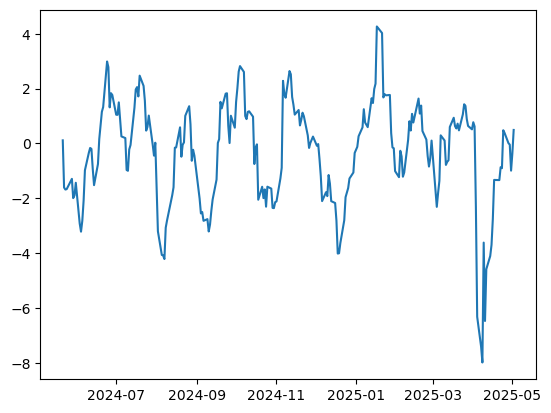

In [ ]:
win = 15;#window size
stocks_year_sma = stocks_year.rolling(window=win).mean()
stocks_year_detrended_sma = stocks_year-stocks_year_sma
ADF_test(stocks_year_sqrt.dropna())
KPSS_test(stocks_year_sqrt.dropna(),reg='ct')
plt.plot(stocks_year_detrended_sma.index,stocks_year_detrended_sma)


ADF Test Results
ADF Statistic: -1.6606870197951389
p-value:0.4514729631825371
Critical values:
1%:-3.4566744514553016
5%:-2.8731248767783426
10%:-2.5729436702592023
KPSS Test Results:
KPSS Statistic: 0.06951665857217838
p-value:0.1
Critical values:
10%:0.119
5%:0.146
2.5%:0.176
1%:0.216


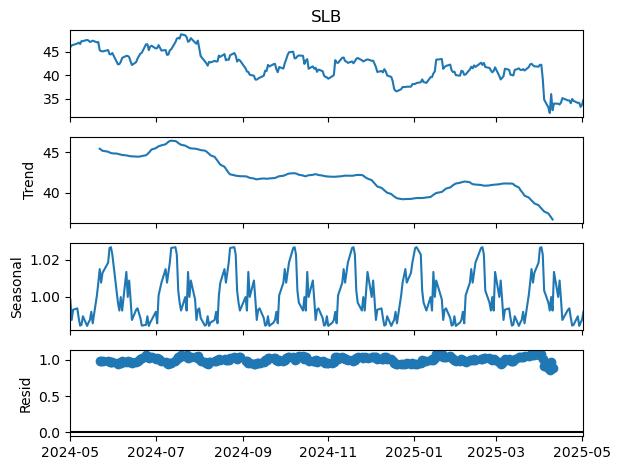

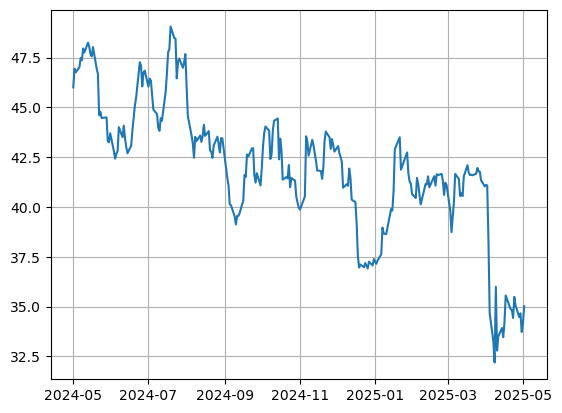

In [ ]:
decomposition_additive = classical_time_series_decomposition(stocks_year,model = 'multiplicative', period=30)
stocks_year_seasonally_adjusted = decomposition_additive.observed/decomposition_additive.seasonal
plt.figure()
plt.plot(stocks_year_seasonally_adjusted.index,stocks_year_seasonally_adjusted)
plt.grid()
ADF_test(stocks_year_sqrt.dropna())
KPSS_test(stocks_year_sqrt.dropna(),reg='ct')


ADF Test Results
ADF Statistic: -1.6606870197951389
p-value:0.4514729631825371
Critical values:
1%:-3.4566744514553016
5%:-2.8731248767783426
10%:-2.5729436702592023
KPSS Test Results:
KPSS Statistic: 0.06951665857217838
p-value:0.1
Critical values:
10%:0.119
5%:0.146
2.5%:0.176
1%:0.216


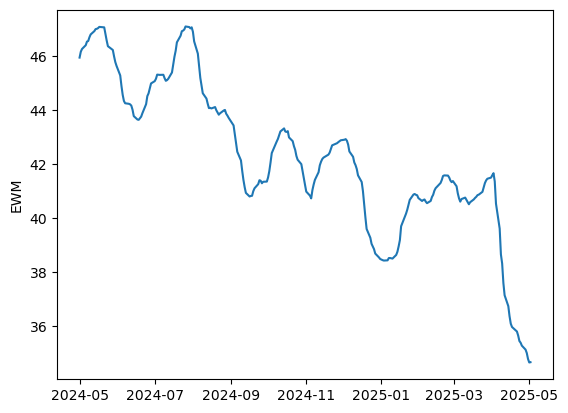

In [ ]:
win=15;
stocks_year_ewm = stocks_year.ewm(span=win).mean()
plt.plot(stocks_year_ewm.index,stocks_year_ewm)
plt.ylabel('EWM')
ADF_test(stocks_year_sqrt.dropna())
KPSS_test(stocks_year_sqrt.dropna(),reg='ct')

# ACF and PACF plot

Text(0.5, 1.0, 'Autocorrelation Factor (ACF)')

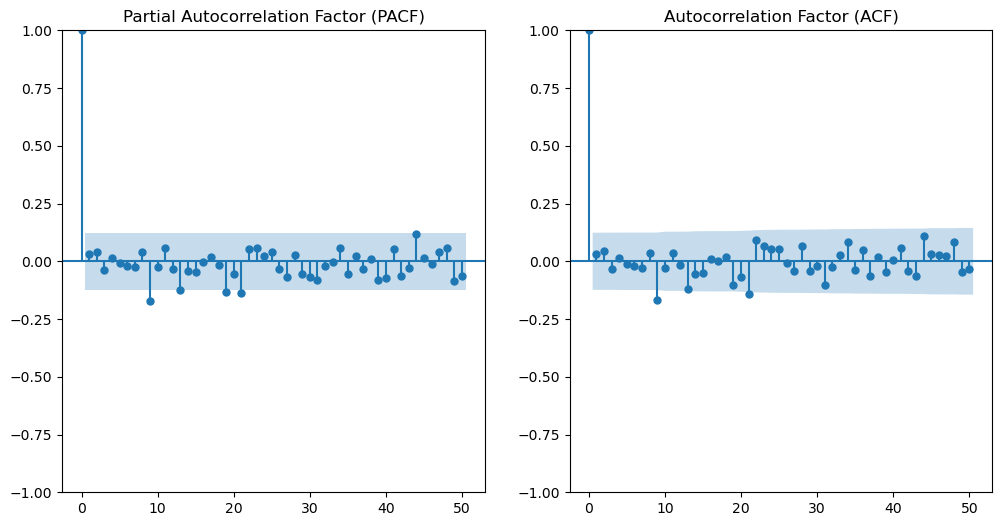

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,6))
#d=1

#PACF plot
plt.subplot(121)
plot_pacf(stocks_year_diff.dropna(),ax=plt.gca(), lags=50, method='ywm')
plt.title('Partial Autocorrelation Factor (PACF)')
#p=0

#ACF plot
plt.subplot(122)
plot_acf(stocks_year_diff.dropna(),ax=plt.gca(), lags=50)
plt.title('Autocorrelation Factor (ACF)')
#q=0

Text(0.5, 1.0, 'Autocorrelation Factor (ACF)')

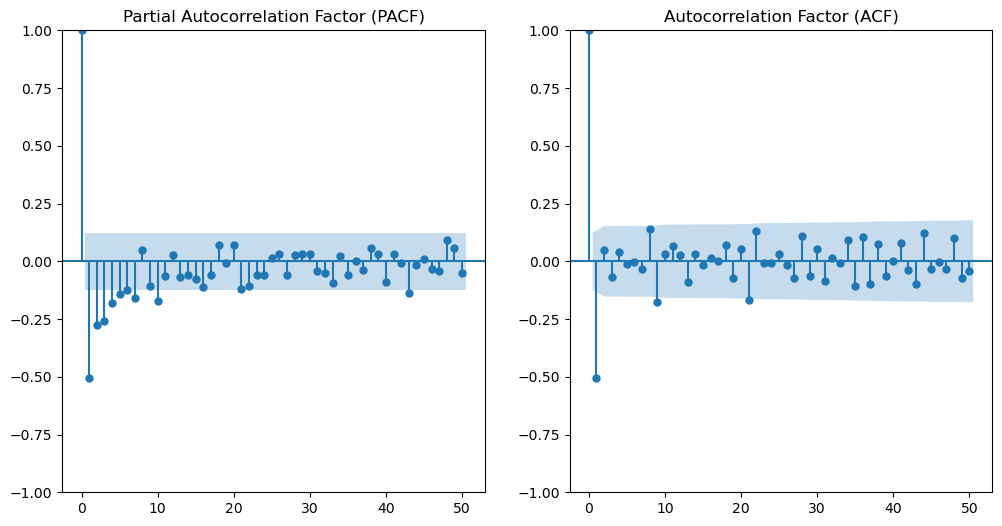

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,6))
#d=2

#PACF plot
plt.subplot(121)
plot_pacf(stocks_year_diff.diff().dropna(),ax=plt.gca(), lags=50, method='ywm')
plt.title('Partial Autocorrelation Factor (PACF)')
#p=7

#ACF plot
plt.subplot(122)
plot_acf(stocks_year_diff.diff().dropna(),ax=plt.gca(), lags=50)
plt.title('Autocorrelation Factor (ACF)')
#q=1

# Train-Test Split

In [ ]:
train_data, test_data = stocks_year[:-30], stocks_year[-30:]

# Modeling using ARIMA

RMSE:  6
520.7162160916415
551.2588640088128


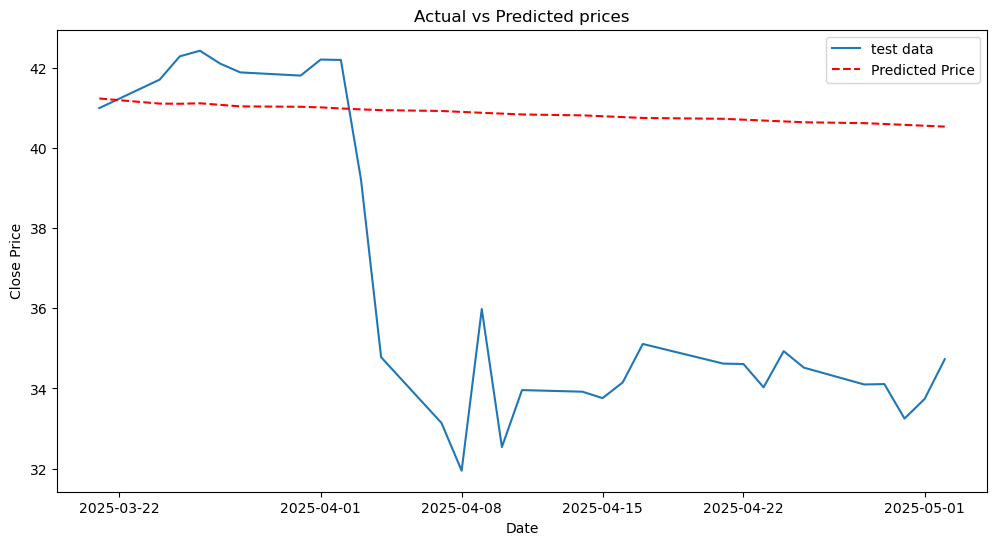

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_data,order=(7,2,1))
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,dynamic=False)

plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label="test data")
plt.plot(test_data.index, predictions, color='red', linestyle='--', label="Predicted Price")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted prices')
plt.legend()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)))
print('RMSE: ',rmse)
print(model_fit.aic)
print(model_fit.bic)

# AutoRegression

RMSE:  4
AIC 359.75575480869395
BIC 624.9735316866401


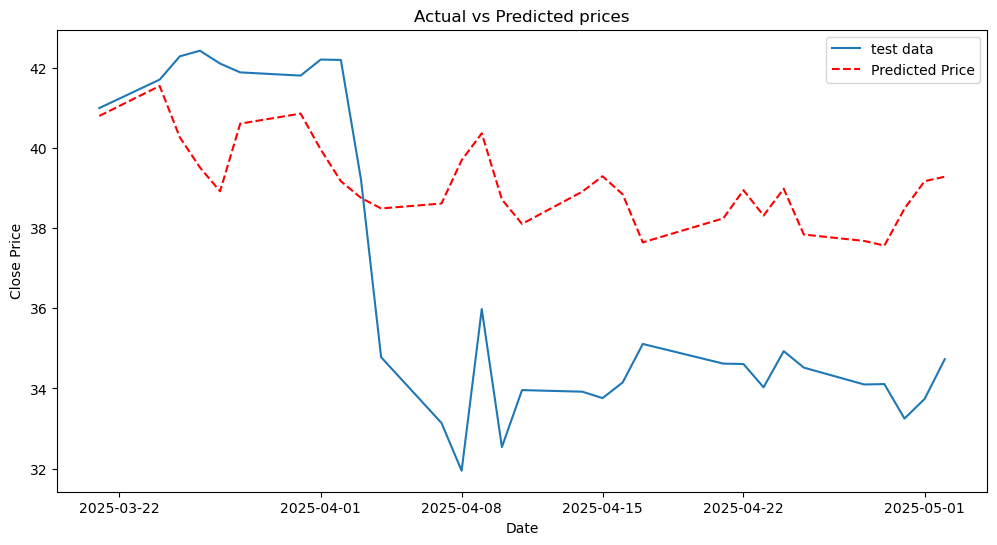

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
model=AutoReg(train_data,lags=90)
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,dynamic=False)

plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label="test data")
plt.plot(test_data.index, predictions, color='red', linestyle='--', label="Predicted Price")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted prices')
plt.legend()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)))
print('RMSE: ',rmse)
print('AIC',model_fit.aic)
print('BIC',model_fit.bic)

SARIMA model

RMSE:  4
403.38281032963107
437.88517820804486


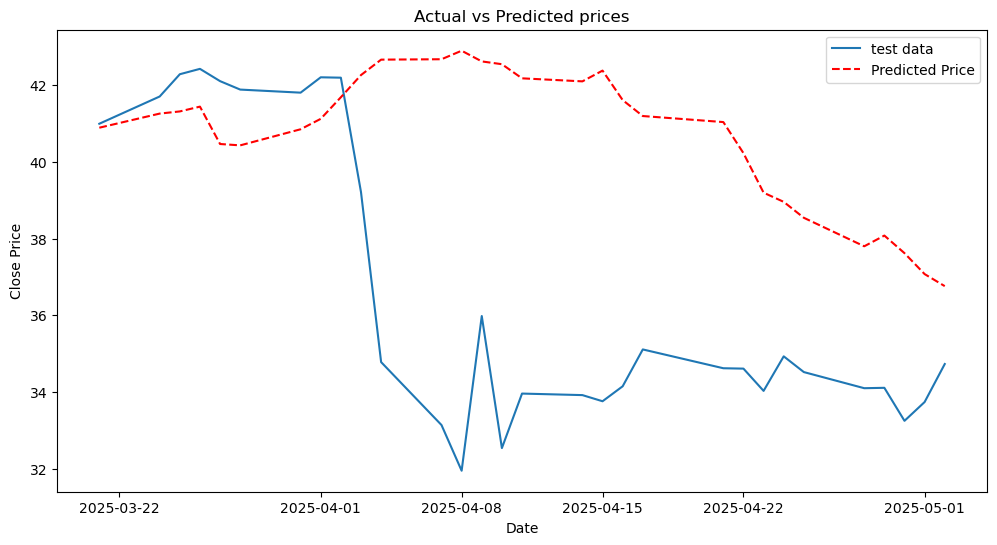

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p,d,q = 7,1,2
P,D,Q,s = 1,1,1,90

model = SARIMAX(train_data, order=(p,d,q), seasonal_order=(P,D,Q,s))
model_fit = model.fit()

predictions_sarima = model_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,dynamic=False)

plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label="test data")
plt.plot(test_data.index, predictions_sarima, color='red', linestyle='--', label="Predicted Price")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted prices')
plt.legend()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)))
print('RMSE: ',rmse)
print(model_fit.aic)
print(model_fit.bic)